# Imports

In [3]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-08-05 16:09:15.653763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 16:09:16.948187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data Exploration

In [4]:
df = pd.read_csv('fake_job_postings.csv')

In [5]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.shape

(17880, 18)

<Axes: >

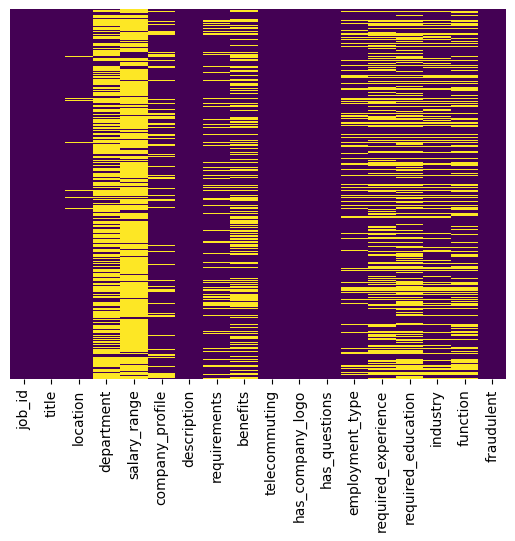

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [13]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [14]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [15]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [17]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

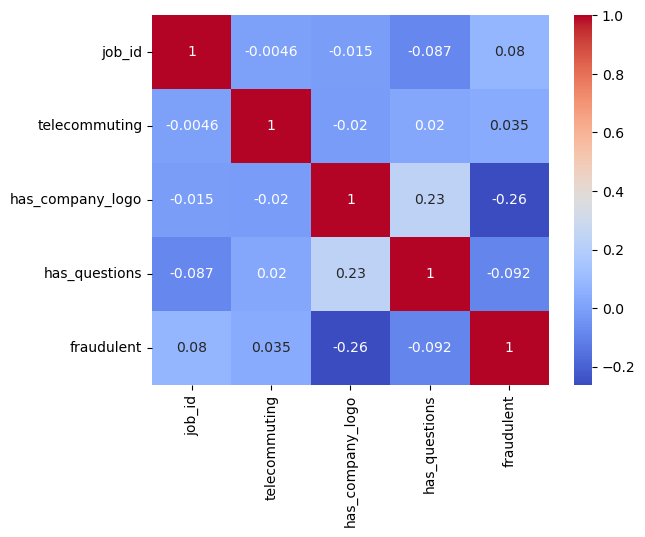

In [18]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [19]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

<Axes: xlabel='has_company_logo'>

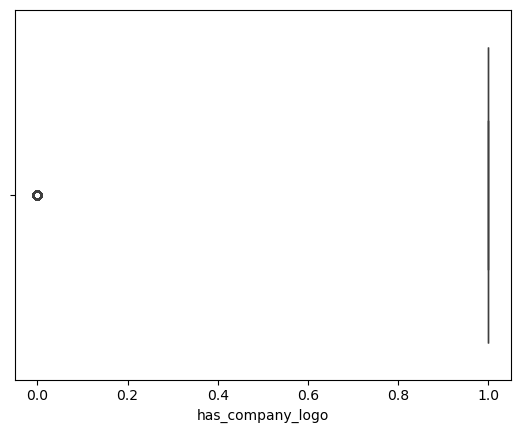

In [20]:
sns.boxplot(x='has_company_logo',data=df)

In [21]:
df=df[df['has_company_logo']>0.0]

<Axes: xlabel='has_company_logo'>

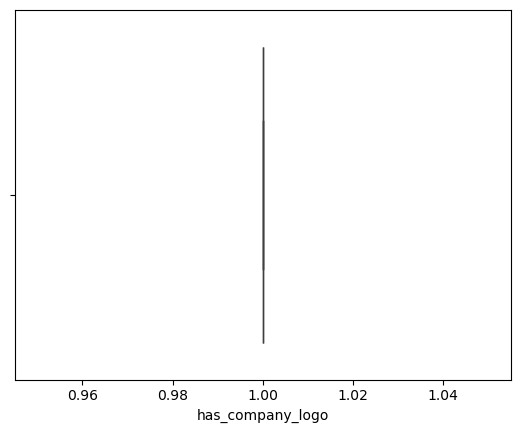

In [22]:
sns.boxplot(x='has_company_logo',data=df)

In [23]:
df['country'] = df['location'].str.split(',').str[0]

/tmp/ipykernel_11181/1353859512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].str.split(',').str[0]


In [24]:
df.nunique()

job_id                 14220
title                   9091
location                2393
department              1078
salary_range             659
company_profile         1579
description            11723
requirements            9812
benefits                5095
has_company_logo           1
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
country                   86
dtype: int64

/tmp/ipykernel_11181/1657835631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

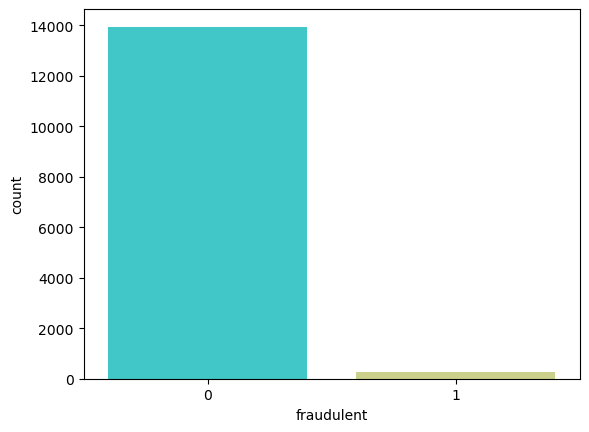

In [25]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

In [26]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [27]:
real=df[df['fraudulent']==0]
real.shape

(13937, 17)

In [28]:
df.shape

(14220, 17)

In [29]:
fake=fake.sample(13937,replace=True)

In [30]:
real.shape,fake.shape

((13937, 17), (13937, 17))

In [31]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,604,Lead Mechanical Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
1,1,9099,Restaurant Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
2,2,1855,Automation Software Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesB.E. (...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,1,US
3,3,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
4,4,998,EXECUTIVE SOUS CHEF,"MY, ,",NaN,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,NaN,NaN,1,Contract,Executive,NaN,Hospitality,NaN,1,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


/tmp/ipykernel_11181/1657835631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

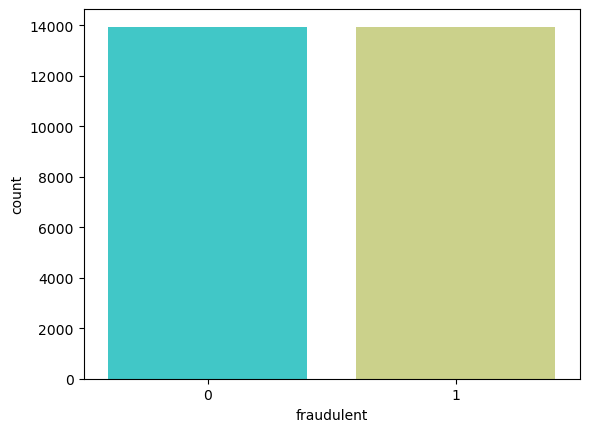

In [32]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

/tmp/ipykernel_11181/1481425060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

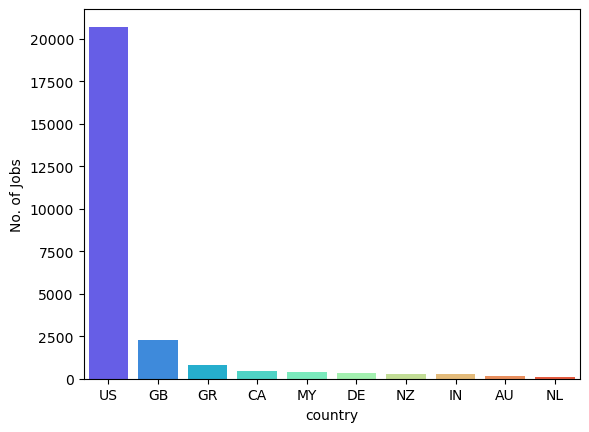

In [33]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

/tmp/ipykernel_11181/2002234686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

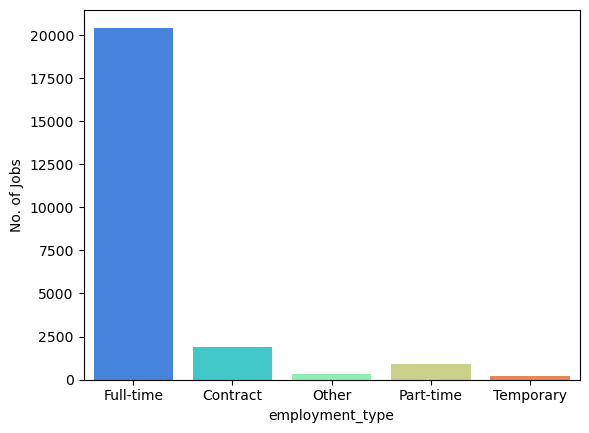

In [34]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [35]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,604,Lead Mechanical Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
1,9099,Restaurant Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
2,1855,Automation Software Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesB.E. (...,NaN,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,1,US
3,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
4,998,EXECUTIVE SOUS CHEF,"MY, ,",NaN,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,NaN,NaN,1,Contract,Executive,NaN,Hospitality,NaN,1,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


/tmp/ipykernel_11181/1517523785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

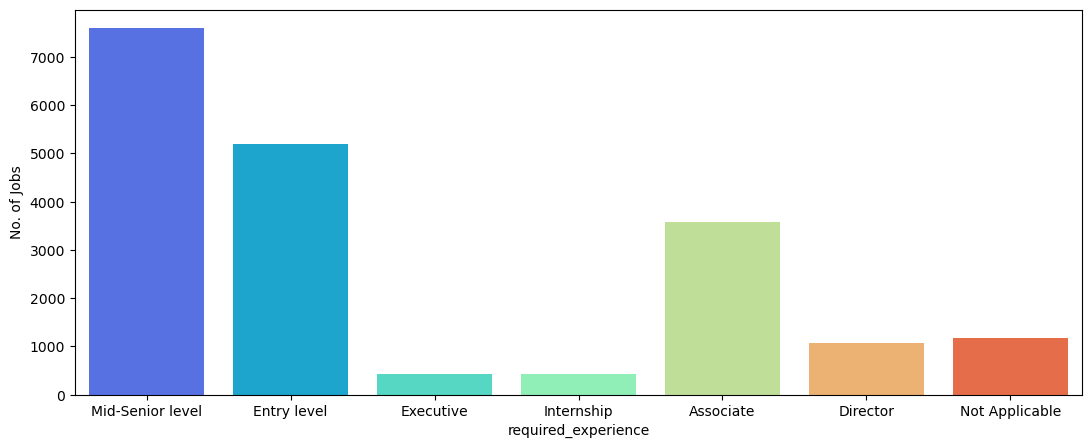

In [36]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

/tmp/ipykernel_11181/884709019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

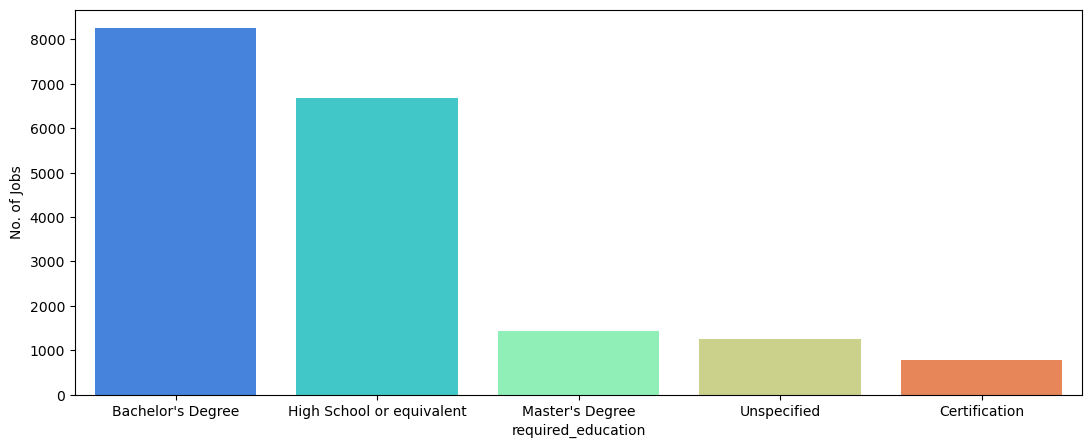

In [37]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [38]:
df.fillna(' ',inplace=True)

In [39]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [40]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,604,Lead Mechanical Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,,,Oil & Energy,Engineering,1,US
1,9099,Restaurant Manager,,,,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",,1,,,,,,1,
2,1855,Automation Software Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesB.E. (...,,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,1,US
3,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
4,998,EXECUTIVE SOUS CHEF,"MY, ,",,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,,,1,Contract,Executive,,Hospitality,,1,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,,,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,1,Contract,,,Utilities,,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


In [41]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [42]:
df.drop('country',axis=1,inplace=True)

In [43]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,604,1,1,"Lead Mechanical Engineer US, TX, Houston Ake..."
1,9099,1,1,Restaurant Manager Awarded by Expatriate L...
2,1855,1,1,"Automation Software Engineer US, TX, Houston ..."
3,8837,1,1,"Maintenance Specialist US, TX, ARLINGTON 23000..."
4,998,1,1,"EXECUTIVE SOUS CHEF MY, , 55000-65000 Le Meri..."


In [44]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

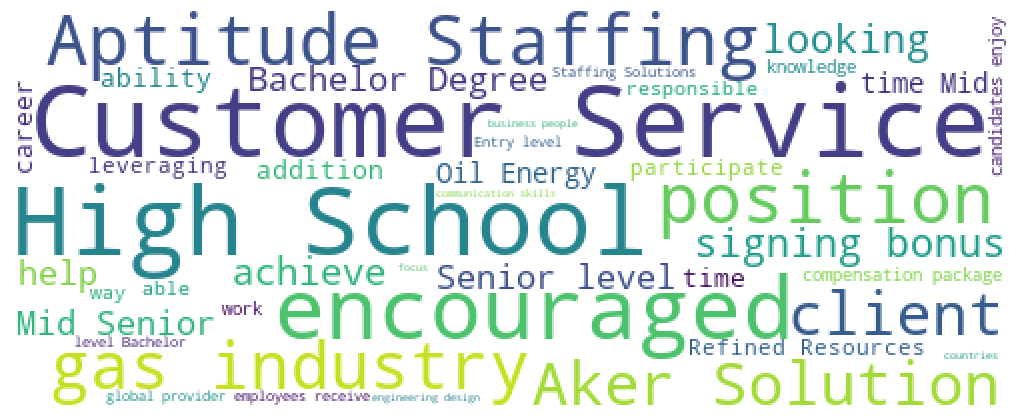

In [45]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

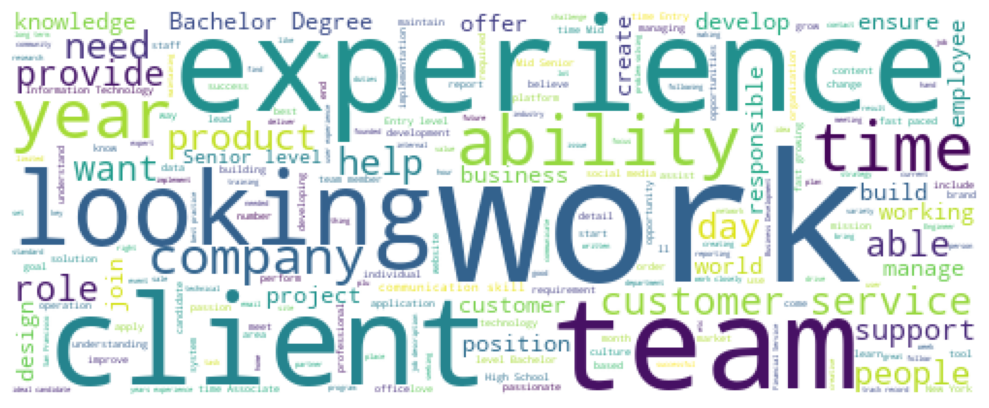

In [46]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

# Data Cleaning


In [47]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [50]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,604,1,1,lead mechanical engineer us tx houston aker so...
1,9099,1,1,restaurant manager awarded expatriate lifestyl...
2,1855,1,1,automation software engineer us tx houston ake...
3,8837,1,1,maintenance specialist us tx arlington 23000 2...
4,998,1,1,executive sous chef 55000 65000 le meridien si...


# Data Normalization

Using spaCy's English language model (`en_core_web_sm`) for text preprocessing. The function called `normalize_text` tokenizes the input text, lemmatizes each token, and then returns the normalized text.

In [ ]:
!python -m spacy download en_core_web_md

In [51]:
# def normalize_text_batch(texts):
#     # Process texts in batches
#     docs = list(nlp.pipe(texts, batch_size=1000))
#     return [' '.join([token.lemma_ for token in doc]) for doc in docs]


nlp = spacy.load("en_core_web_md")

def normalize_text(text):
    """Normalize text by lemmatizing using spaCy."""
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [52]:
# Apply text normalization
df['combined_text'] = df['combined_text'].apply(normalize_text)

# # Define batch size
# batch_size = 1000

# # Split DataFrame into batches
# batches = np.array_split(df['combined_text'], len(df) // batch_size + 1)

# # Process each batch
# for batch in batches:
#     df.loc[batch.index, 'combined_text'] = normalize_text_batch(batch)

In [53]:
def get_pos_features(text):
    """Generate POS tags for a given text."""
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return ' '.join(tag[1] for tag in tags)

In [54]:
# Generate POS tags and vectorize them
df['pos_features'] = df['combined_text'].apply(get_pos_features)

In [55]:
# Vectorize text and POS features separately
text_vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = text_vectorizer.fit_transform(df['combined_text'])

pos_vectorizer = CountVectorizer()  # Use a new vectorizer for POS tags
pos_matrix_train = pos_vectorizer.fit_transform(df['pos_features'])

# Combine text and POS feature matrices
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

In [56]:
# Save vectorizers
with open('text_vectorizer.pkl', 'wb') as file:
    pickle.dump(text_vectorizer, file)

with open('pos_vectorizer.pkl', 'wb') as file:
    pickle.dump(pos_vectorizer, file)

# Feature Extraction

Preprocess the text data by applying **Part-of-Speech tagging** and **CountVectorizer**. It generates additional features based on grammatical structures and combines them with original text features. Finally, it saves the vectorizer for consistent preprocessing.

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
# text_columns = ['combined_text']

# df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
# df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

# X_train = df.drop('fraudulent', axis=1)
# y_train = df['fraudulent']

# vectorizer = CountVectorizer(ngram_range=(1, 2))
# text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
# pos_matrix_train = vectorizer.transform(X_train['pos_features'])
# combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

# with open('countvectorizer.pkl', 'wb') as file:
#     pickle.dump(vectorizer, file)

# Models

In [57]:
X=combined_matrix_train
y=df['fraudulent'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Train and evaluate the model using MLP
model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, batch_size=64, solver='adam', random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print metrics
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)


In [ ]:
# Save the trained model
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from scipy.sparse import hstack
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Build and train the model using Keras
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('keras_mlp_model.h5')


In [ ]:
import pickle
import pandas as pd
from scipy.sparse import hstack
import tensorflow as tf

# Load the saved vectorizers
with open('text_vectorizer.pkl', 'rb') as file:
    text_vectorizer = pickle.load(file)

with open('pos_vectorizer.pkl', 'rb') as file:
    pos_vectorizer = pickle.load(file)

# Load the saved model
model = tf.keras.models.load_model('keras_mlp_model.h5')

# Assume df_test is your test DataFrame
df_test['combined_text'] = df_test['combined_text'].apply(normalize_text)
df_test['pos_features'] = df_test['combined_text'].apply(get_pos_features)

# Transform test data using the loaded vectorizers
text_matrix_test = text_vectorizer.transform(df_test['combined_text'])
pos_matrix_test = pos_vectorizer.transform(df_test['pos_features'])

# Combine text and POS feature matrices
combined_matrix_test = hstack([text_matrix_test, pos_matrix_test])
X_test = combined_matrix_test.todense()

# Predict using the trained model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Assume df_test['fraudulent'] is the true labels
accuracy = accuracy_score(df_test['fraudulent'], y_pred)
precision = precision_score(df_test['fraudulent'], y_pred)
recall = recall_score(df_test['fraudulent'], y_pred)
f1 = f1_score(df_test['fraudulent'], y_pred)
cm = confusion_matrix(df_test['fraudulent'], y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print metrics
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [ ]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### MultinomialNB

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [ ]:
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model2, file)

### SVC

In [ ]:
model3 = SVC()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [ ]:
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(model3, file)

### Descision Tree

In [ ]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [ ]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model5, file)

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

# Load the trained model and vectorizers
with open('logistic_regression_model1.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

with open('text_vectorizer.pkl', 'rb') as file:
    text_vectorizer = pickle.load(file)

with open('pos_vectorizer.pkl', 'rb') as file:
    pos_vectorizer = pickle.load(file)

def clean_text(text):
    """Implement text cleaning if needed."""
    return text.strip() if text else ""

def normalize_text(text):
    """Normalize text by lemmatizing using spaCy."""
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

def get_pos_features(text):
    """Generate POS tags for a given text."""
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return ' '.join(tag[1] for tag in tags)

def preprocess_input(title, location, salary_range, company_profile, description, requirements, benefits, employment_type, required_experience, required_education, industry, function, department):
    """Preprocess input text."""
    combined_text = f"{title} {location} {salary_range} {company_profile} {description} {requirements} {benefits} {employment_type} {required_experience} {required_education} {industry} {function} {department}"
    cleaned_text = clean_text(combined_text)
    normalized_text = normalize_text(cleaned_text)
    pos_features = get_pos_features(normalized_text)
    return normalized_text, pos_features

def vectorize_input(normalized_text, pos_features, text_vectorizer, pos_vectorizer):
    """Vectorize the normalized text and POS features."""
    text_matrix = text_vectorizer.transform([normalized_text])
    pos_matrix = pos_vectorizer.transform([pos_features])
    combined_matrix = hstack([text_matrix, pos_matrix])
    return combined_matrix

def predict(input_data, model, text_vectorizer, pos_vectorizer):
    """Make a prediction based on the input data."""
    normalized_text, pos_features = preprocess_input(*input_data)
    text_matrix = vectorize_input(normalized_text, pos_features, text_vectorizer, pos_vectorizer)
    prediction = model.predict(text_matrix)
    return prediction

# Example input
input_data_fraudulent = (
    "Chief Executive Officer",
    "Remote",
    "$1,000,000 - $2,000,000",
    "Unbelievably successful company with a secretive reputation",
    "Lead the company to unprecedented financial success with minimal work required.",
    "No experience required, open to all educational backgrounds, must have an excellent network.",
    "Unlimited vacation, annual bonuses up to $500,000, free luxury vacations.",
    "Full-time",
    "No experience needed",
    "No degree required",
    "Finance",
    "Executive",
    "Management"
)


# Make prediction
prediction = predict(input_data, logistic_model, text_vectorizer, pos_vectorizer)
print("Prediction:", "Fraudulent" if prediction[0] == 1 else "Not Fraudulent")


In [ ]:
import pickle

# Load model and vectorizer
with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

with open('countvectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Print the number of features from the vectorizer
print(f"Number of features in vectorizer: {len(vectorizer.get_feature_names_out())}")

# Print the number of features expected by the model
print(f"Number of features expected by the model: {logistic_model.n_features_in_}")
